# 1. Import Necessary Libraries

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [143]:
#converting into dataframe
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [144]:
df.shape

(1000, 40)

In [145]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [146]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Imputing Missing Values with Medians

In [131]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# 3. Exploratory Data Analysis Data Visualization

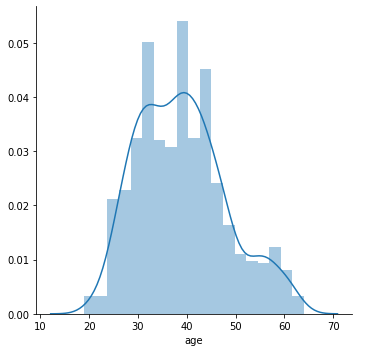

In [8]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'age')\
    .add_legend();
plt.show()

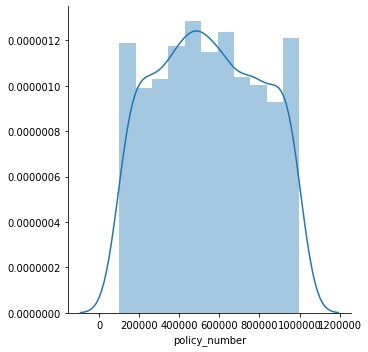

In [9]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'policy_number')\
    .add_legend();
plt.show()

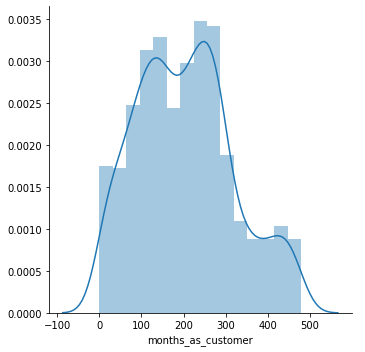

In [11]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'months_as_customer')\
    .add_legend();
plt.show()

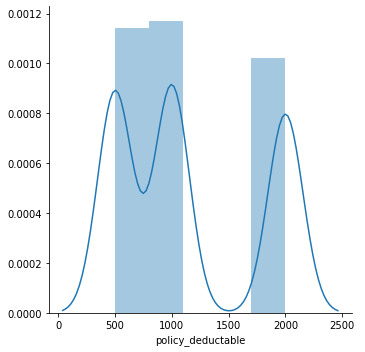

In [12]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'policy_deductable')\
    .add_legend();
plt.show()

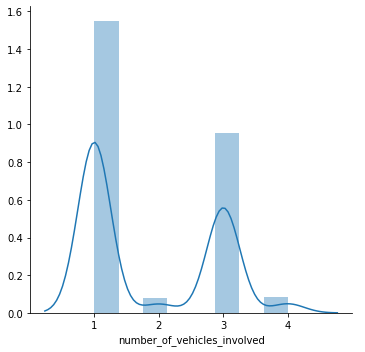

In [13]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'number_of_vehicles_involved')\
    .add_legend();
plt.show()

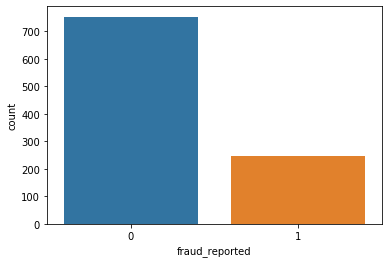

In [74]:
sns.countplot(df.fraud_reported)

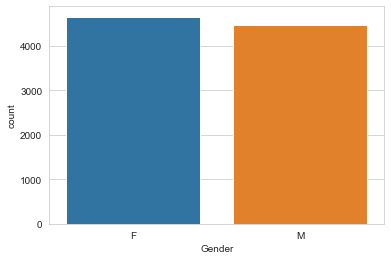

In [64]:
sns.countplot(df.Gender)

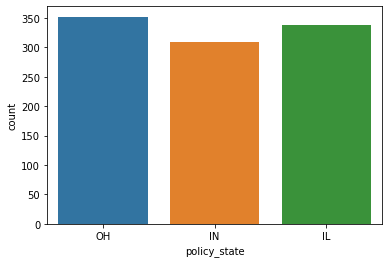

In [10]:
sns.countplot(df.policy_state)

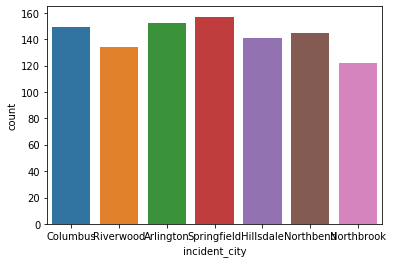

In [12]:
sns.countplot(df.incident_city)

# 4.  Data Visualization with PCA

In [13]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [14]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['policy_bind_date']= label_encoder.fit_transform(df['policy_bind_date'])  
df['policy_state']= label_encoder.fit_transform(df['policy_state']) 
df['policy_csl']= label_encoder.fit_transform(df['policy_csl']) 
df['insured_sex']= label_encoder.fit_transform(df['insured_sex']) 
df['insured_education_level']= label_encoder.fit_transform(df['insured_education_level']) 
df['insured_occupation']= label_encoder.fit_transform(df['insured_occupation']) 
df['insured_hobbies']= label_encoder.fit_transform(df['insured_hobbies']) 
df['insured_relationship']= label_encoder.fit_transform(df['insured_relationship']) 
df['incident_date']= label_encoder.fit_transform(df['incident_date']) 
df['incident_type']= label_encoder.fit_transform(df['incident_type']) 
df['collision_type']= label_encoder.fit_transform(df['collision_type']) 
df['incident_severity']= label_encoder.fit_transform(df['incident_severity']) 
df['authorities_contacted']= label_encoder.fit_transform(df['authorities_contacted']) 
df['incident_state']= label_encoder.fit_transform(df['incident_state']) 
df['incident_city']= label_encoder.fit_transform(df['incident_city']) 
df['incident_location']= label_encoder.fit_transform(df['incident_location']) 
df['property_damage']= label_encoder.fit_transform(df['property_damage']) 
df['police_report_available']= label_encoder.fit_transform(df['police_report_available']) 
df['auto_make']= label_encoder.fit_transform(df['auto_make']) 
df['auto_model']= label_encoder.fit_transform(df['auto_model']) 
df['fraud_reported']= label_encoder.fit_transform(df['fraud_reported']) 

In [15]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
features = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
        'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year']

x = df.loc[:, features].values

y = df.loc[:,['fraud_reported']].values

x = StandardScaler().fit_transform(x)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [20]:
finalDf = pd.concat([principalDf, df[['fraud_reported']]], axis = 1)

In [21]:
finalDf

,principal component 1,principal component 2,fraud_reported
0,-1.116199,1.131047,1
1,3.991673,0.748603,1
2,0.423573,-0.998071,0
3,0.143443,0.914904,1
4,3.529476,1.259944,0
...,...,...,...
995,-1.605649,-1.135023,0
996,-3.890347,0.546231,0
997,-1.188028,-0.793982,0
998,0.694329,3.886711,0


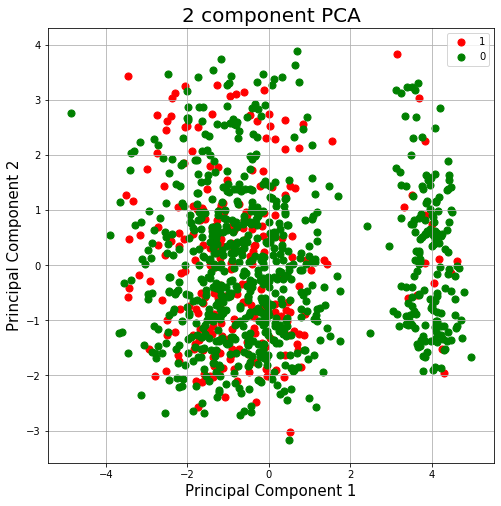

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['fraud_reported'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


# 4. Data pre-processing and cleaning

#### Other way to remove outliers is zscore but it needs all fetures to be numerical

In [27]:
# If data has outliers then we can remove them by using zscore<br>
#from scipy import stats
#z=abs(stats.zscore(df_train))
#print(np.where(z>3))
#df_train=df_train[(z<3).all(axis=1)]

## A.Converting all features to numerical features 

In [28]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [147]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['policy_bind_date']= label_encoder.fit_transform(df['policy_bind_date'])  
df['policy_state']= label_encoder.fit_transform(df['policy_state']) 
df['policy_csl']= label_encoder.fit_transform(df['policy_csl']) 
df['insured_sex']= label_encoder.fit_transform(df['insured_sex']) 
df['insured_education_level']= label_encoder.fit_transform(df['insured_education_level']) 
df['insured_occupation']= label_encoder.fit_transform(df['insured_occupation']) 
df['insured_hobbies']= label_encoder.fit_transform(df['insured_hobbies']) 
df['insured_relationship']= label_encoder.fit_transform(df['insured_relationship']) 
df['incident_date']= label_encoder.fit_transform(df['incident_date']) 
df['incident_type']= label_encoder.fit_transform(df['incident_type']) 
df['collision_type']= label_encoder.fit_transform(df['collision_type']) 
df['incident_severity']= label_encoder.fit_transform(df['incident_severity']) 
df['authorities_contacted']= label_encoder.fit_transform(df['authorities_contacted']) 
df['incident_state']= label_encoder.fit_transform(df['incident_state']) 
df['incident_city']= label_encoder.fit_transform(df['incident_city']) 
df['incident_location']= label_encoder.fit_transform(df['incident_location']) 
df['property_damage']= label_encoder.fit_transform(df['property_damage']) 
df['police_report_available']= label_encoder.fit_transform(df['police_report_available']) 
df['auto_make']= label_encoder.fit_transform(df['auto_make']) 
df['auto_model']= label_encoder.fit_transform(df['auto_model']) 
df['fraud_reported']= label_encoder.fit_transform(df['fraud_reported']) 
df['_c39']= label_encoder.fit_transform(df['_c39']) 


In [148]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,2004,1,0
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,1,657
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,2007,0,658
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,2014,1,659
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,2009,0,660


## B.Removing outliers using standard methods

In [149]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df1=df[(z<3).all(axis=1)]

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


### E .Train_test Split

In [150]:
y=df['fraud_reported']
x=df.drop(['fraud_reported'],axis=1)

In [151]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [153]:
round(X_train, 2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,_c39
703,270,41,639027,657,0,1,1000,817.28,0,460263,...,1,1,60190,4630,9260,46300,8,24,2014,122
311,10,26,582973,342,1,0,2000,765.64,0,466191,...,3,0,31350,2850,5700,22800,6,6,2001,937
722,269,41,334749,897,2,0,2000,1422.21,0,620507,...,1,1,85900,17180,17180,51540,11,15,2005,64
629,330,47,912665,855,0,0,2000,1133.27,0,432218,...,2,2,60500,11000,5500,44000,5,14,1999,34
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,464,61,632627,221,2,2,1000,1125.37,0,604450,...,2,2,79800,6650,19950,53200,10,3,2000,699
270,369,55,577810,451,2,1,2000,1589.54,0,444734,...,0,2,85300,17060,8530,59710,12,18,2003,926
860,230,42,175960,502,1,0,1000,1023.11,0,476130,...,2,2,58850,10700,10700,37450,0,23,1999,452
435,102,28,810189,901,2,1,500,1075.41,0,445648,...,0,1,73400,7340,7340,58720,4,27,1996,779


### F.Normalizing all numerical features

In [53]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [139]:
from sklearn.preprocessing import Normalizer
feature_scaler = Normalizer()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [140]:
X_train

array([[3.40182483e-04, 5.16573400e-05, 8.05132561e-01, ...,
        3.02384429e-05, 2.53750934e-03, 1.53712085e-04],
       [1.33721664e-05, 3.47676325e-05, 7.79561194e-01, ...,
        8.02329982e-06, 2.67577049e-03, 1.25297199e-03],
       [3.76721362e-04, 5.74184975e-05, 4.68799625e-01, ...,
        2.10067674e-05, 2.80790457e-03, 8.96288742e-05],
       ...,
       [4.46947405e-04, 8.16164827e-05, 3.41934198e-01, ...,
        4.46947405e-05, 3.88455593e-03, 8.78348814e-04],
       [1.09544120e-04, 3.00709349e-05, 8.70112167e-01, ...,
        2.89969730e-05, 2.14362807e-03, 8.36616368e-04],
       [4.60124113e-04, 6.76168052e-05, 6.41927561e-01, ...,
        2.63870459e-05, 3.31982021e-03, 1.14618731e-03]])

# 5. Building Models

# Model1 : KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [55]:
clf.best_params_

{'n_neighbors': 81}

In [157]:
from sklearn.model_selection import cross_val_score
k_range = range(1,100,10)
k_scores = []


for k in k_range:
  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.7272227891156462, 0.7775884353741498, 0.7782925170068027, 0.7822091836734695, 0.7925425170068027, 0.780295918367347, 0.7597585034013605, 0.7476343537414966, 0.7353435374149659, 0.7311394557823129]


Text(0, 0.5, 'Cross-Validated Accuracy')

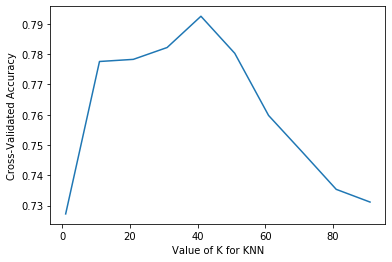

In [158]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

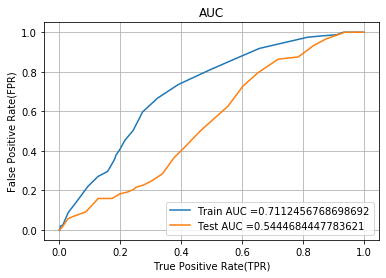

In [56]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=81)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict_proba(X_train)  
y_test_pred = neigh.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [57]:
y_pred=neigh.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       242
           1       0.00      0.00      0.00        88

    accuracy                           0.73       330
   macro avg       0.37      0.50      0.42       330
weighted avg       0.54      0.73      0.62       330

0.7333333333333333


## Confusion Matrix

In [58]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [59]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[142 100]
 [ 51  37]]


In [60]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

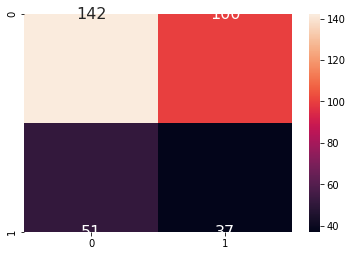

In [61]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 2 : Logistic Regression 

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8328594813474628


In [64]:
model.best_params_

{'C': 1}

In [65]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7076502514167132, 0.7686015111607736, 0.7716530981456355, 0.7657487961263203, 0.7657487961263203]


In [66]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

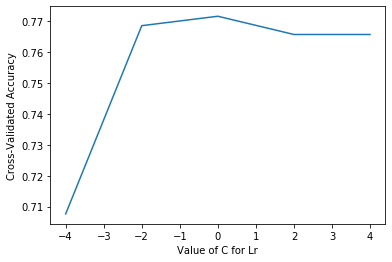

In [67]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

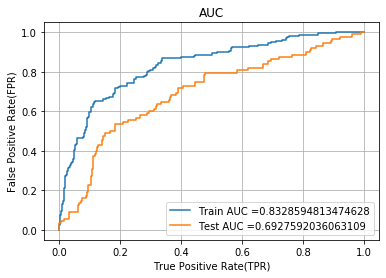

In [68]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=1)
Lr.fit(X_train, y_train)

y_train_pred = Lr.predict_proba(X_train)  
y_test_pred = Lr.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [69]:
y_pred=Lr.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       242
           1       0.42      0.17      0.24        88

    accuracy                           0.72       330
   macro avg       0.58      0.54      0.53       330
weighted avg       0.66      0.72      0.67       330

0.7151515151515152


## Confusion Matrix

In [70]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [71]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[186  56]
 [ 39  49]]


In [72]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

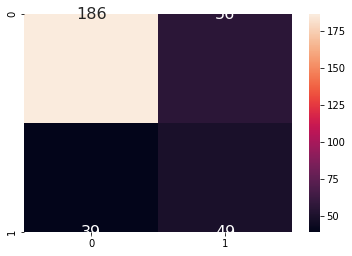

In [73]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Linear regression 

In [155]:
# we can't use linear regression as its a pure classification model 


# Model 4 : SVM

In [75]:
from sklearn.svm import SVC

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVC(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8158500412312767


In [76]:
model.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [77]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVC(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7626985393886183, 0.7626985393886183, 0.7626985393886183, 0.7627204884667571, 0.7627424375448958]


In [78]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

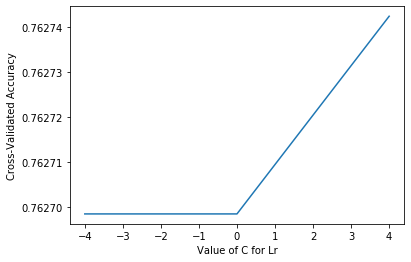

In [79]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

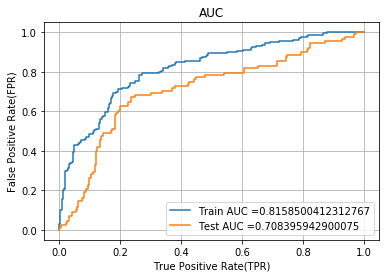

In [80]:
from sklearn.svm import SVC

svm = SVC(C=1000,gamma=0.0001,kernel= 'rbf',probability=True)

svm.fit(X_train, y_train)


y_train_pred = svm.predict_proba(X_train)  
y_test_pred = svm.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [82]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       242
           1       0.42      0.16      0.23        88

    accuracy                           0.72       330
   macro avg       0.59      0.54      0.53       330
weighted avg       0.66      0.72      0.67       330

0.7181818181818181


## Confusion Matrix

In [83]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [84]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[188  54]
 [ 33  55]]


In [85]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

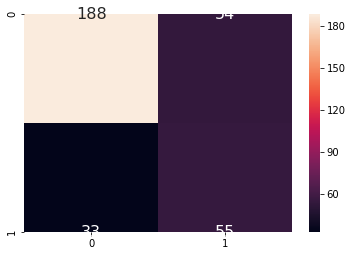

In [86]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 5 : Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
#min_samples_split :The minimum number of samples required to split an internal node, if less than this number can't split

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}

clf = DecisionTreeClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [88]:
model.best_params_

{'max_depth': 5, 'min_samples_split': 100}

In [89]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeClassifier(max_depth=k, min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.8194834650278022, 0.8060054008034692, 0.8059827866017505, 0.8059827866017505]


Text(0, 0.5, 'Cross-Validated Accuracy')

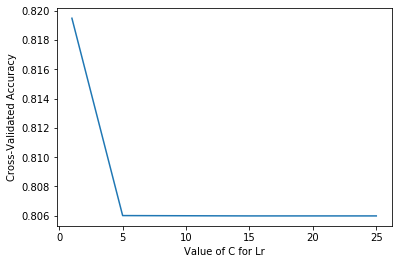

In [90]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

# Tried without hyperparameters

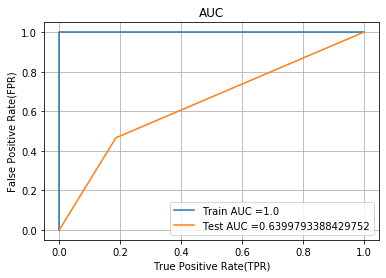

In [91]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

## Overfitting on train data as we are training very deep trees 

# Traning with best hyperparameters

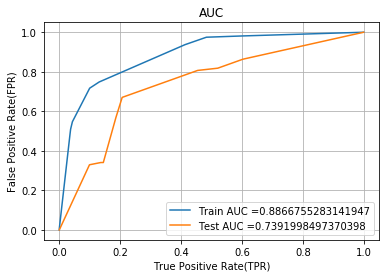

In [92]:
DT = DecisionTreeClassifier(max_depth=5,min_samples_split=100)

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [93]:
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       242
           1       0.46      0.34      0.39        88

    accuracy                           0.72       330
   macro avg       0.62      0.60      0.60       330
weighted avg       0.70      0.72      0.70       330

0.7181818181818181


## Confusion Matrix

In [95]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [96]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[132 110]
 [ 17  71]]


In [97]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

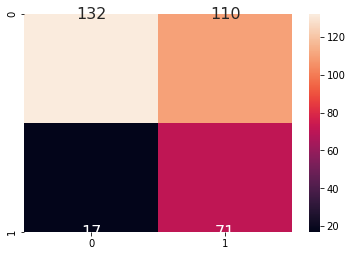

In [98]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 6 : Ensemble Techniques 

## A. Bagging

In [100]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = RandomForestClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9731812083841032


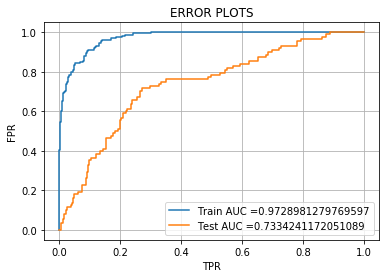

In [101]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(max_depth=5,n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)


y_train_pred =  RF.predict_proba(X_train)[:,1]      
y_test_pred =  RF.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Classification Report

In [102]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       242
           1       0.49      0.50      0.50        88

    accuracy                           0.73       330
   macro avg       0.66      0.66      0.66       330
weighted avg       0.73      0.73      0.73       330

0.7303030303030303


## Confusion Matrix

In [104]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

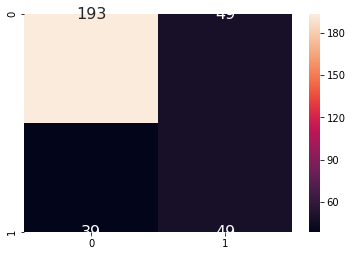

In [105]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Boosting

In [106]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.7597670924117205


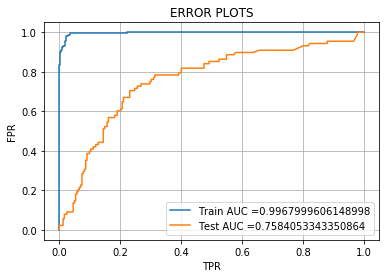

In [110]:
from sklearn.model_selection import GridSearchCV

GBDT=GradientBoostingClassifier(max_depth=5,n_estimators=20)
GBDT.fit(X_train, y_train)


y_train_pred =  GBDT.predict_proba(X_train)[:,1]      
y_test_pred =  GBDT.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [111]:
y_pred=GBDT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       242
           1       0.60      0.38      0.46        88

    accuracy                           0.77       330
   macro avg       0.70      0.64      0.66       330
weighted avg       0.75      0.77      0.75       330

0.7666666666666667


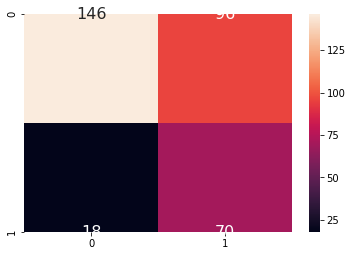

In [112]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Stacking

## Note: As we have very less data stascking is not advisable 

## Tried using SGDclassifier with different types of loss 

In [113]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [120]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = SGDClassifier(alpha=10, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf3.fit(X_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train, y_train)
#print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(X_train, y_train)
#print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(X_train, y_train)
#print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(X_test))))
    log_error =log_loss(y_test, sclf.predict_proba(X_test))
    if best_alpha > log_error:
        best_alpha = log_error

--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.682
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.624
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.575
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.574
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.596
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.610


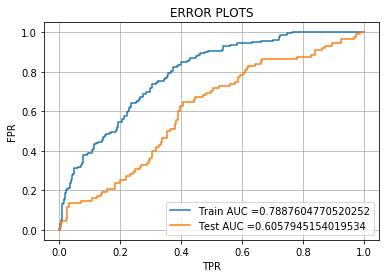

In [121]:
lr = LogisticRegression(C=10)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)


y_train_pred =  sclf.predict_proba(X_train)[:,1]      
y_test_pred =  sclf.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

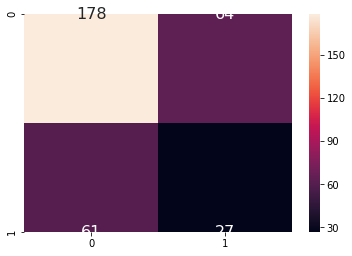

In [122]:
## Confusion Matrix

def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

[23:23:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


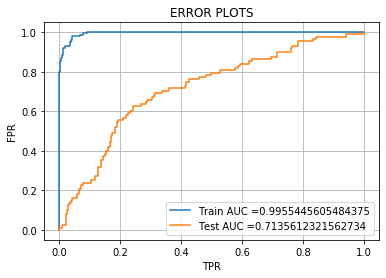

In [123]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_train_pred =  xgb_model.predict(X_train)      
y_test_pred =  xgb_model.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# 6.Model Comparison

In [156]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Sr.No","Model", "Accuracy", "AUC"]

#setting row values
table.add_row(['1',"KNN", '73.33','54.44' ])
table.add_row(['2',"Logistic Regression", '71.51','69.27' ])
table.add_row(['3',"SVM", '71.81','70.83' ])
table.add_row(['4',"Decision Tree",'71.81' ,'73.89' ])
table.add_row(['5',"RandomForest",'73.03' ,'73.34' ])
table.add_row(['6',"GBDT",'76.66' ,'75.84' ])
table.add_row(['7',"Xgboost",'--' ,'71.53' ])
table.add_row(['8',"Stacking", '--','60.58' ])
print(table)

+-------+---------------------+----------+-------+
| Sr.No |        Model        | Accuracy |  AUC  |
+-------+---------------------+----------+-------+
|   1   |         KNN         |  73.33   | 54.44 |
|   2   | Logistic Regression |  71.51   | 69.27 |
|   3   |         SVM         |  71.81   | 70.83 |
|   4   |    Decision Tree    |  71.81   | 73.89 |
|   5   |     RandomForest    |  73.03   | 73.34 |
|   6   |         GBDT        |  76.66   | 75.84 |
|   7   |       Xgboost       |    --    | 71.53 |
|   8   |       Stacking      |    --    | 60.58 |
+-------+---------------------+----------+-------+


Summary:<br>
1.GBDT has highet AUC but its genralization error very high so we will take Decision tress as final and best model.
2.As the data is imbalanced the accuracy score is affected.<br>
3.Ensembles like Xgboost ,staking , GBDT doesn't perform very well due to very less amount of data

# 7.Creating Submission File

In [125]:
best_model=DT
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']